In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [ ]:
nltk.download()




Fetch reddit API user data


In [ ]:
import praw

reddit = praw.Reddit(client_id='y9aowlfsW7dLZyFuyrpH-w',
                     client_secret='3PSSrFjw7RX-nG6xfyFx_IFd74PHbQ',
                     user_agent='Huften')

Initialize headlines and posts objects

In [4]:
headlines = set()
postText = set()

Loop over headlines and posts on a Subreddit

In [5]:
for submission in reddit.subreddit('bitcoin').new(limit=100):
    headlines.add(submission.title)
    postText.add(submission.selftext)
    display.clear_output()
    print(len(headlines))

100


Perform vader sentiment analysis on headlines

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.4767,
  'headline': 'The next bitcoin halving will be in approximately 909 days. Keep on stacking my '
              'friends while bitcoin is cheap.',
  'neg': 0.0,
  'neu': 0.853,
  'pos': 0.147},
 {'compound': 0.128,
  'headline': 'Bitcoiners Are The Slave that Broke Free | Dr. Jack Kruse',
  'neg': 0.199,
  'neu': 0.567,
  'pos': 0.234},
 {'compound': -0.2732,
  'headline': 'Russia doesn’t plan to ban crypto outrightly like China, says deputy finance '
              'minister',
  'neg': 0.211,
  'neu': 0.643,
  'pos': 0.146}]


Perform vader sentiment analysis on Posts

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for text in postText:
    pol_score = sia.polarity_scores(text)
    pol_score['post text'] = text
    results.append(pol_score)
print(pol_score)
pprint(results[:3], width=100)

Create a table of analysis data for result(headlines or posts)

In [7]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.000,0.853,0.147,0.4767,The next bitcoin halving will be in approximat...
1,0.199,0.567,0.234,0.1280,Bitcoiners Are The Slave that Broke Free | Dr....
2,0.211,0.643,0.146,-0.2732,Russia doesn’t plan to ban crypto outrightly l...
3,0.000,0.734,0.266,0.4404,why run a business if HODLing BTC gives better...
4,0.000,0.616,0.384,0.6808,This was definitely a first for everyone invol...


Create a table of analysis data for result with a label
1 = mostly positive, 0 = neutral, -1 = mostly negative

In [8]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.000,0.853,0.147,0.4767,The next bitcoin halving will be in approximat...,1
1,0.199,0.567,0.234,0.1280,Bitcoiners Are The Slave that Broke Free | Dr....,0
2,0.211,0.643,0.146,-0.2732,Russia doesn’t plan to ban crypto outrightly l...,-1
3,0.000,0.734,0.266,0.4404,why run a business if HODLing BTC gives better...,1
4,0.000,0.616,0.384,0.6808,This was definitely a first for everyone invol...,1


Create a .csv file with results(headlines or posts) and their label

In [9]:
df2 = df[['headline', 'label']]
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

Print a results and their label

In [10]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['The next bitcoin halving will be in approximately 909 days. Keep on stacking my friends while bitcoin is cheap.',
 'why run a business if HODLing BTC gives better returns?',
 'This was definitely a first for everyone involved. Thanks Suzuki El Salvador.',
 'Venezuelan international airport to accept Bitcoin payments - Report',
 'Jamie Dimon Is GREAT For Bitcoin- ANTHONY POMPLIANO IS BACK ON YOUTUBE WITH BITCOIN VIDEOS BEING FLOODED OUT! Time To Revolt…Bitcoin To The Moon 🌚 🚀']

Negative headlines:

['Russia doesn’t plan to ban crypto outrightly like China, says deputy finance minister',
 'Bitcoin Whales Continue to Grow as BTC Charges Past $56k',
 'Bitcoin Under Major Attack (Again)',
 'How to take down a scam website before it’s too late?',
 'Truth about BITCOIN | When BTC CRASH? Cryptocurrency & Blockchain Explained']


Plot graph of label percentage representation

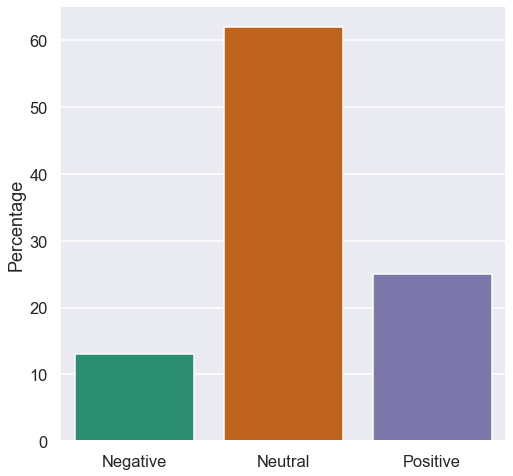

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()